# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

### Objective:


*   Identify Optimal hyperplane.
*   SVM Kernels.
*   Deal with the non-linear and inseparable plane.
*   Perform binary and multi-class classification on Iris dataset and get the support vectors that are the basis for the max margin.

Linear data separable

*  Find the extreme points of the dataset, which are called support vectors.
*  Get the optimal hyperplane which has the highest margin between the line and support vectors
<br><br>

![alt text](https://cdn.talentsprint.com/aiml/aiml_2020_b14_hyd/experiment_details_backup/linear_data.png)

Non-linear and inseparable planes

*  Use Kernels to transform data into higher dimensions.
*  Separate the points using Linear SVM

![alt text](https://cdn.talentsprint.com/aiml/aiml_2020_b14_hyd/experiment_details_backup/non_linear_data.png)

### Data Loading and Visualization

### Import libraries

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

### Load dataset

In [ ]:
iris = sns.load_dataset("iris")

**View the data features**

In [ ]:
# Print the first 5 rows of the data
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


**Perform feature correlation to find linearly and non-linear separable classes that can be classified using SVM**

For More information regarding `sns.pairplot` refer following [link](https://seaborn.pydata.org/generated/seaborn.pairplot.html)


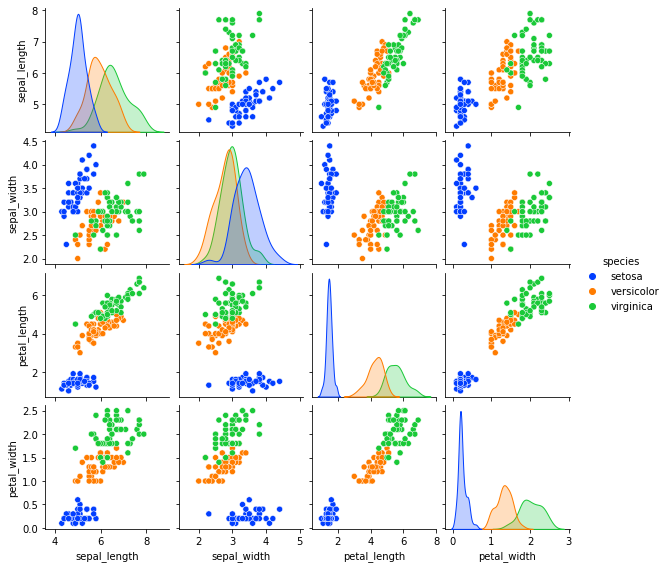

In [ ]:
sns.pairplot(iris, hue="species",palette="bright", height=2, aspect=1)

### Case 1: Binary Classification with non-linear data

Considering Versicolor and Virginica classes from the Iris dataset, we see that data is not linearly separable. Let us transform the data to 3D to check the data separation in multi-dimension. We can apply rbf kernel to separate the classes.
- Labels are Versicolor and Virginica
- Features are petal_length and petal_width

In [ ]:
df = iris[(iris['species'] != 'setosa')]
df = df.drop(['sepal_length','sepal_width'], axis=1)
df.head()

,petal_length,petal_width,species
50,4.7,1.4,versicolor
51,4.5,1.5,versicolor
52,4.9,1.5,versicolor
53,4.0,1.3,versicolor
54,4.6,1.5,versicolor


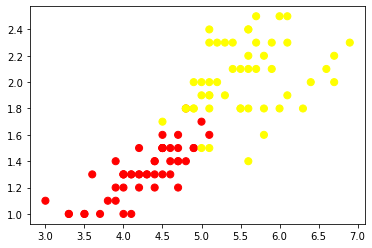

In [ ]:
# Convert categorical values to numerical values
df = df.replace('versicolor', 1)
df = df.replace('virginica', 2)

# Assign data to 'x2' and labels to 'y2'
x = df.iloc[:, 0:2]
y = df['species']

# View the scatter plot
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, s=50, cmap='autumn')

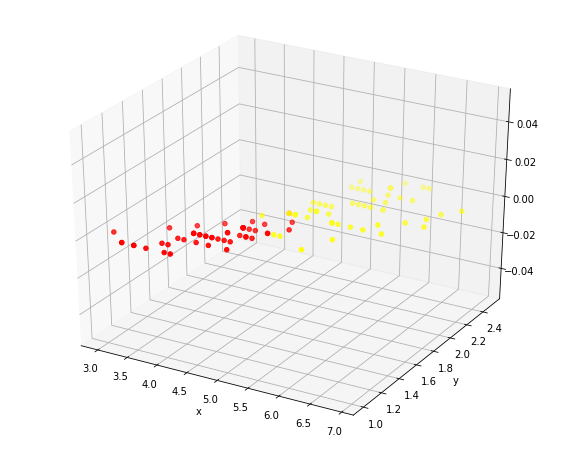

In [ ]:
# Visualzing in 3d
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(projection='3d')
ax.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, s=20, cmap='autumn')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

Split the data into train and test

In [ ]:
# Perform train-test split of the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(70, 2) (70,)
(30, 2) (30,)


In [ ]:
model = SVC(kernel='poly')
model.fit(X_train, y_train)

# Get the SVM accuracy
predict = model.predict(X_test)
accuracy_score(predict, y_test)

0.9666666666666667

In [ ]:
model.support_vectors_

array([[4.9, 1.5],
       [4.7, 1.6],
       [5.1, 1.6],
       [5. , 1.7],
       [4.8, 1.8],
       [4.7, 1.5],
       [5. , 1.5],
       [4.9, 1.8],
       [4.8, 1.8],
       [5.6, 1.4],
       [4.5, 1.7],
       [5.1, 1.8]])

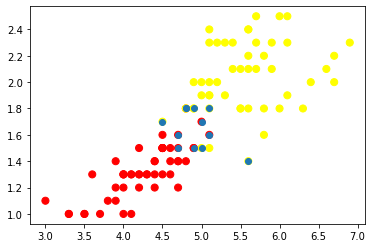

In [ ]:
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, s=50, cmap='autumn')
plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1])

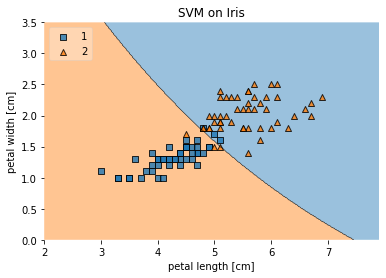

In [ ]:
# Plotting decision regions
plot_decision_regions(x.values, y.values, clf=model, legend=2)

# Adding axes annotations
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.title('SVM on Iris')
plt.show()

### Case 2: Multi class classification 


In [ ]:
df1 = iris
df1 = df1.drop(['sepal_length','sepal_width'], axis=1)
df1 = df1.replace('setosa', 0)
df1 = df1.replace('versicolor', 1)
df1 = df1.replace('virginica', 2)
df1.head()

,petal_length,petal_width,species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


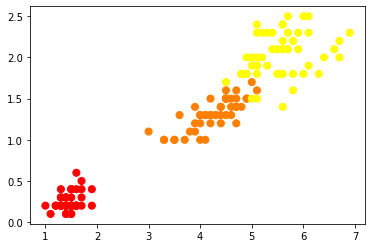

In [ ]:
x1 = df1.iloc[:,:2]
y1 = df1['species']

# View the scatter plot
plt.scatter(x1.iloc[:, 0], x1.iloc[:, 1], c=y1, s=50, cmap='autumn')

In [ ]:
# Perform train-test split of the data
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.15)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(127, 2) (127,)
(23, 2) (23,)


In [ ]:
# Training, prediction and accuracy
model_mutliclass = SVC(kernel='poly')
model_mutliclass.fit(X_train, y_train)

# Get the SVM accuracy
predict = model_mutliclass.predict(X_test)
accuracy_score(predict, y_test)

1.0

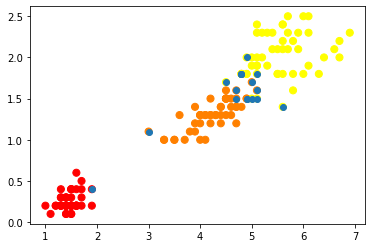

In [ ]:
plt.scatter(x1.iloc[:, 0], x1.iloc[:, 1], c=y1, s=50, cmap='autumn')
plt.scatter(model_mutliclass.support_vectors_[:,0], model_mutliclass.support_vectors_[:,1])

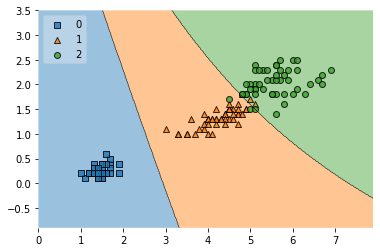

In [ ]:
plot_decision_regions(x1.values, y1.values, clf=model_mutliclass, legend=2)
plt.show()